# Coleta dos dados do pcap

In [15]:
!pip install scapy
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 9.6 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 11.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 18.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 11.8 MB/s eta 0:00:00a 0:00:01


In [9]:
from scapy.all import rdpcap

# Abre o arquivo pcap e carrega os pacotes
packets = rdpcap('dados.pcap')

# Exibe informações sobre os pacotes capturados
for packet in packets:
    print(packet.summary())

Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / 

Encontrar os endereços de origem e destino no arquivo sem repetir

In [10]:
from scapy.layers.inet import IP

# Lista os endereços IP de origem e destino sem repetições
seen_ips = set()
for packet in packets:
    if IP in packet:
        src, dst = packet[IP].src, packet[IP].dst
        if (src, dst) not in seen_ips:
            print(f"Origem: {src}, Destino: {dst}")
            seen_ips.add((src, dst))

Origem: 10.0.0.1, Destino: 10.0.0.3
Origem: 10.0.0.3, Destino: 10.0.0.1
Origem: 10.0.0.2, Destino: 10.0.0.4
Origem: 10.0.0.4, Destino: 10.0.0.2


Calcular o throughput (taxa de transferência) médio

In [ ]:
from scapy.layers.inet import IP

# Calcula o tamanho total dos pacotes e o tempo total de captura
total_size = sum(len(packet) for packet in packets)
start_time = packets[0].time
end_time = packets[-1].time
duration = end_time - start_time

# Calcula o throughput médio
if duration > 0:
    throughput = total_size / duCalcular o throughput (taxa de transferência) médio.ration  # bytes por segundo
    print(f"Throughput médio: {throughput:.2f} bytes/segundo")
else:
    print("Duração da captura é zero, não é possível calcular o throughput.")

Throughput médio: 251.83 bytes/segundo


Intervalo médio entre pacotes (tempo entre chegadas de pacotes).

In [12]:
# Calcula o intervalo médio entre pacotes
if len(packets) > 1:
    time_intervals = [packets[i + 1].time - packets[i].time for i in range(len(packets) - 1)]
    avg_interval = sum(time_intervals) / len(time_intervals)
    print(f"Intervalo médio entre pacotes: {avg_interval:.6f} segundos")
else:
    print("Não há pacotes suficientes para calcular o intervalo médio.")

Intervalo médio entre pacotes: 0.389400 segundos


Contagem de pacotes (total de pacotes)

In [13]:
# Contagem total de pacotes
total_packets = len(packets)
print(f"Total de pacotes: {total_packets}")

Total de pacotes: 1600


Além disso, o script deve gerar gráficos ilustrativos (usando matplotlib) mostrando
claramente as métricas obtidas

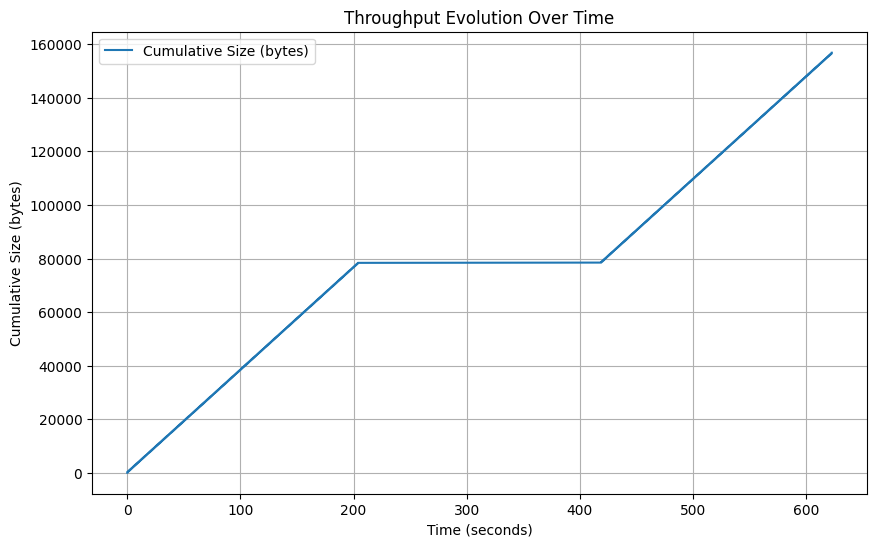

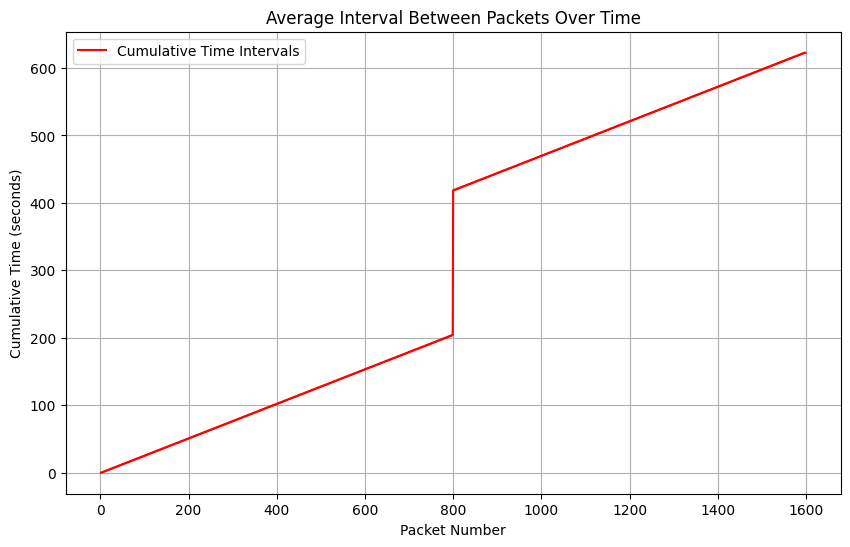

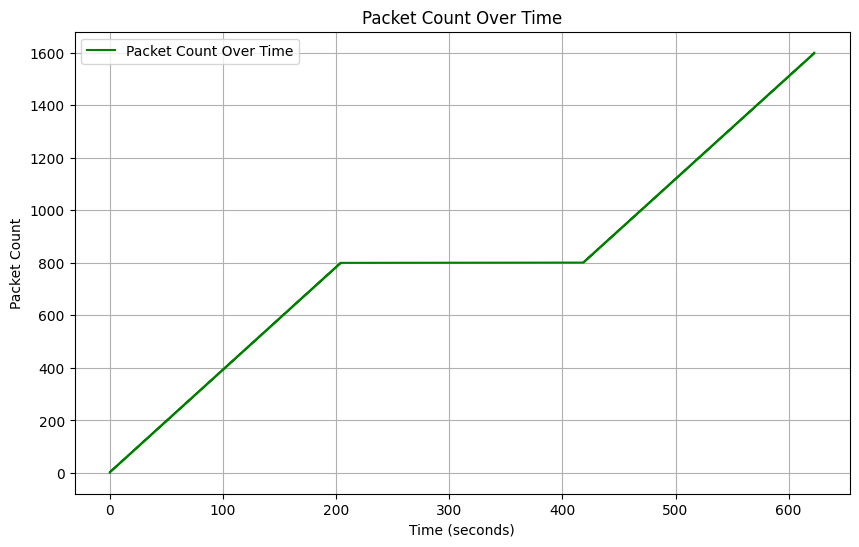

In [21]:
import matplotlib.pyplot as plt

# Gráfico de throughput ao longo do tempo
time_stamps = [packet.time - start_time for packet in packets]  # Normaliza o tempo em relação ao início
packet_sizes = [len(packet) for packet in packets]
cumulative_size = [sum(packet_sizes[:i+1]) for i in range(len(packet_sizes))]

plt.figure(figsize=(10, 6))
plt.plot(time_stamps, cumulative_size, label='Cumulative Size (bytes)')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Size (bytes)')
plt.title('Throughput Evolution Over Time')
plt.legend()
plt.grid()
plt.show()

# Gráfico de intervalo médio entre pacotes
if len(time_intervals) > 0:
    cumulative_intervals = [sum(time_intervals[:i+1]) for i in range(len(time_intervals))]
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_intervals) + 1), cumulative_intervals, label='Cumulative Time Intervals', color='red')
    plt.xlabel('Packet Number')
    plt.ylabel('Cumulative Time (seconds)')
    plt.title('Average Interval Between Packets Over Time')
    plt.legend()
    plt.grid()
    plt.show()

    # Gráfico de número de pacotes por tempo
    plt.figure(figsize=(10, 6))
    plt.plot(time_stamps, range(1, len(time_stamps) + 1), label='Packet Count Over Time', color='green')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Packet Count')
    plt.title('Packet Count Over Time')
    plt.legend()
    plt.grid()
    plt.show()